In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import pydmd



In [38]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/nse500i.csv",header=None) #VARIABLE 1
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

In [39]:
def dmd_pred_plot(dmd,diff,d_ind) :    
    dmode = dmd.modes[:,d_ind].real

    plt.plot(diff)


    # Find the indices of the top 5 elements
    top_5_indices = np.argsort(dmode.real)[-5:]
    print("Top 5 indices :" ,top_5_indices)

    # Mark the indices on the plot
    plt.scatter(top_5_indices,diff[top_5_indices], color='red')

    plt.show()

In [50]:
j=33
df = []
i=6 # VARIABLE 3
  
def dmd_pred(j,i=6) :
    # creating the matrix mat 
    # i days are trained j th day from last 
    mat = matx.iloc[:, -(i+j):-j]
    mat=mat.to_numpy()

    #setting the test set 
    day0 = matx.iloc[:, -j-1]
    day1 = matx.iloc[:, -j]
    day2 = matx.iloc[:, -j+1]
    day3 = matx.iloc[:, -j+2]
    day4 = matx.iloc[:, -j+3]
    day5 = matx.iloc[:, -j+4]
    day6 = matx.iloc[:, -j+5]
    day7 = matx.iloc[:, -j+6]
    day8 = matx.iloc[:, -j+7]
    day9 = matx.iloc[:, -j+8]

    # dmd 
    dmd = pydmd.DMD(svd_rank=mat.shape[1])
    dmd.fit(mat)
    dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 9
    dmd.reconstructed_data.shape

    # prediction

    pred = dmd.reconstructed_data
    pday1 = np.real(pred[:,-9])
    pday2 = np.real(pred[:,-8])
    pday3 = np.real(pred[:,-7])
    pday4 = np.real(pred[:,-6])
    pday5 = np.real(pred[:,-5])
    pday6 = np.real(pred[:,-4])
    pday7 = np.real(pred[:,-3])
    pday8 = np.real(pred[:,-2])
    pday9 = np.real(pred[:,-1])

    # error
    # print("day1 : ",mean_absolute_error(day1,pday1))
    # print("day2 : ",mean_absolute_error(day2,pday2))
    # print("day3 : ",mean_absolute_error(day3,pday3))
    # print("day4 : ",mean_absolute_error(day4,pday4))
    # print("day5 : ",mean_absolute_error(day5,pday5))
    # print("day6 : ",mean_absolute_error(day6,pday6))
    # print("day7 : ",mean_absolute_error(day7,pday7))
    # print("day8 : ",mean_absolute_error(day8,pday8))
    # print("day9 : ",mean_absolute_error(day9,pday9)) 

    d_ind = np.argmax(np.abs(dmd.amplitudes.real))

    if np.any(np.abs(dmd.eigs.real)>1)  :
        print("^^^^ GrowinG ^^^^")
        dmd_pred_plot(dmd,day1-day0,d_ind)
    else:
        print("^^^^ Shrinking ^^^^")
        dmd_pred_plot(dmd,day1-day0,d_ind)



********-~  [DAY -  1 ] ~-********
^^^^ Shrinking ^^^^
Top 5 indices : [ 65 133 439  95  46]


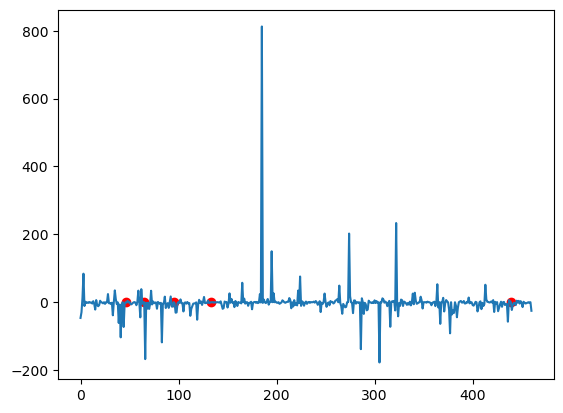

********-~  [DAY -  11 ] ~-********
^^^^ Shrinking ^^^^
Top 5 indices : [351 439  95 133  46]


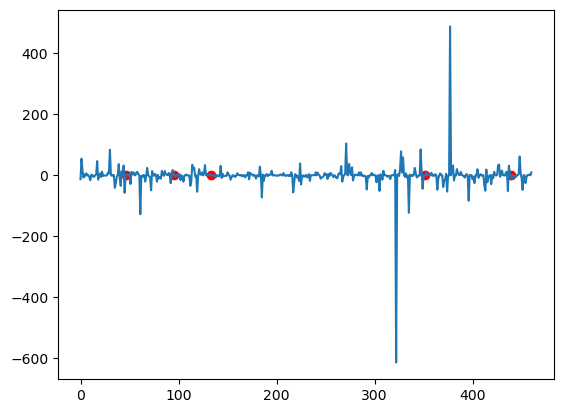

********-~  [DAY -  21 ] ~-********
^^^^ GrowinG ^^^^
Top 5 indices : [ 66 377 185 322 274]


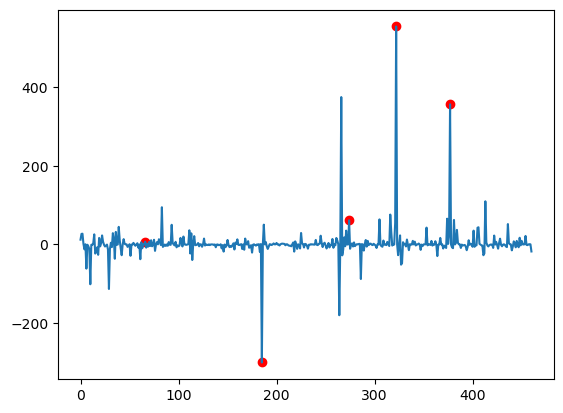

********-~  [DAY -  31 ] ~-********
^^^^ Shrinking ^^^^
Top 5 indices : [ 66 377 185 322 274]


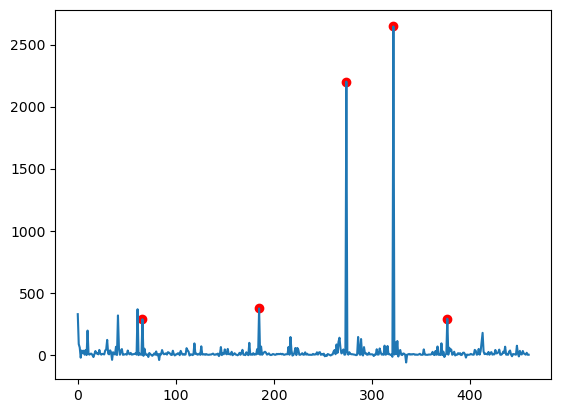

********-~  [DAY -  41 ] ~-********
^^^^ Shrinking ^^^^
Top 5 indices : [ 66 377 185 322 274]


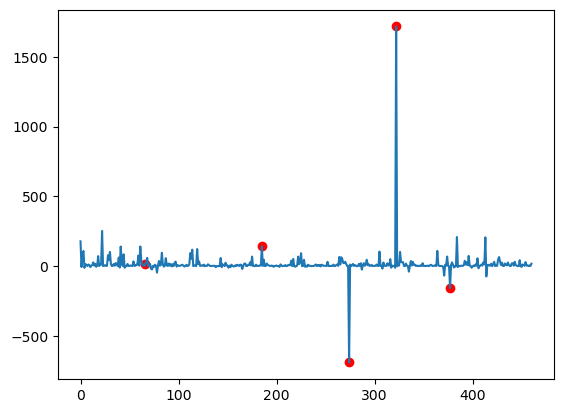

********-~  [DAY -  51 ] ~-********
^^^^ Shrinking ^^^^
Top 5 indices : [351 439  95 133  46]


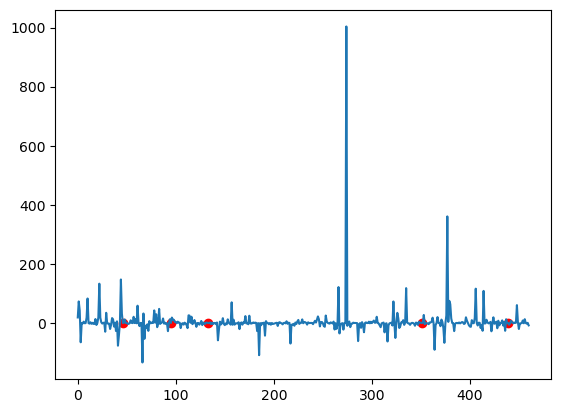

********-~  [DAY -  61 ] ~-********
^^^^ Shrinking ^^^^
Top 5 indices : [351  95 133 439  46]


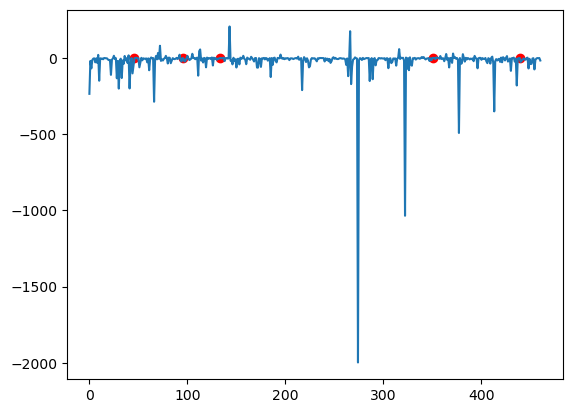

********-~  [DAY -  71 ] ~-********
^^^^ GrowinG ^^^^
Top 5 indices : [ 66 377 185 322 274]


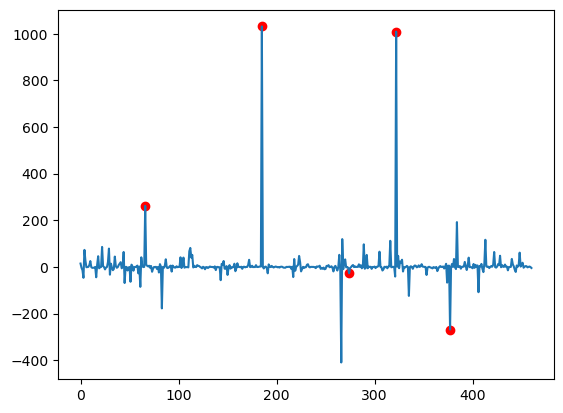

********-~  [DAY -  81 ] ~-********
^^^^ GrowinG ^^^^
Top 5 indices : [ 66 377 185 322 274]


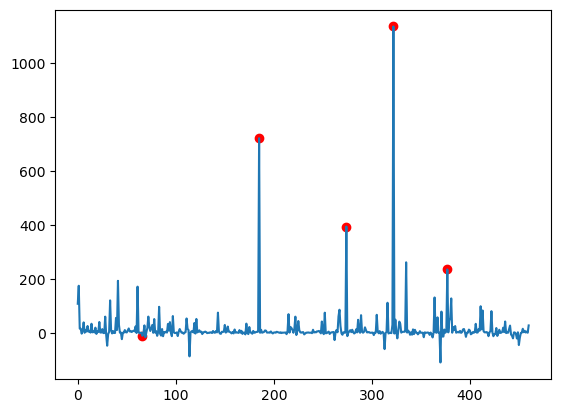

********-~  [DAY -  91 ] ~-********
^^^^ GrowinG ^^^^
Top 5 indices : [ 66 377 185 322 274]


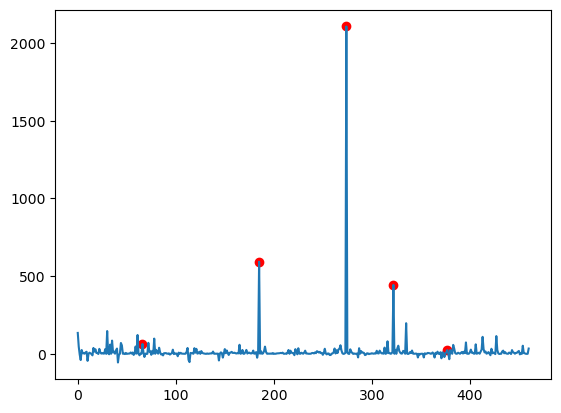

********-~  [DAY -  101 ] ~-********
^^^^ GrowinG ^^^^
Top 5 indices : [ 66 377 185 322 274]


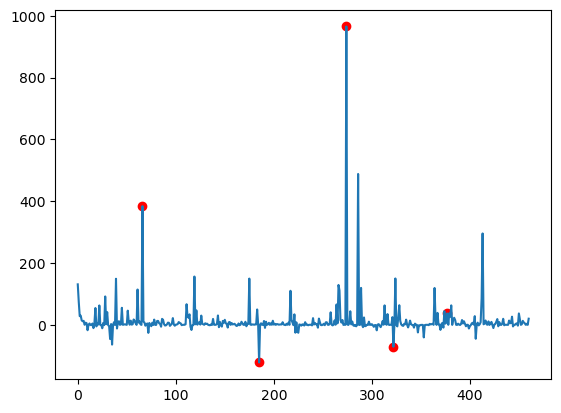

In [51]:
for k in range(1,111,10) :
    print("********-~  [DAY - ",k,"] ~-********")
    dmd_pred(k)